In [27]:
import pandas as pd
import json

df = pd.read_csv("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_raw/eth_cbbtc_usdt.csv")
df = pd.read_csv("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_enriched/eth_cbbtc_usdt.csv")
df = pd.read_csv("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_enriched/eth_cbbtc_usdc.csv")

with open("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/common/markets_meta.json", 'r') as f:
    markets_meta = json.load(f)
market_meta = markets_meta["0x45671fb8d5dea1c4fbca0b8548ad742f6643300eeb8dbd34ad64a658b2b05bca"]

market_meta.keys()

dict_keys(['address', 'lltv', 'oracle_address', 'creation_datetime', 'network', 'loan_asset_address', 'loan_asset_symbol', 'loan_asset_decimals', 'collateral_asset_address', 'collateral_asset_symbol', 'collateral_asset_decimals', 'irm_curve'])

<Axes: >

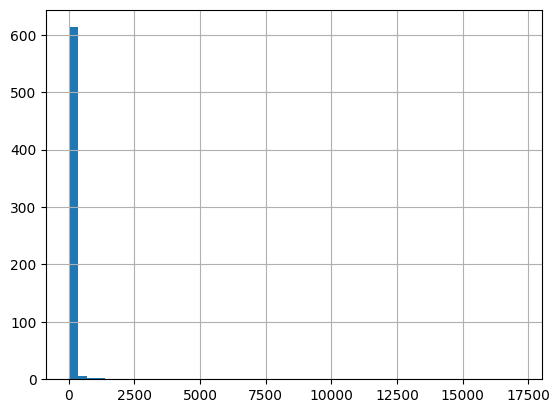

In [28]:
df["user_address"].value_counts().hist(bins=50)

In [34]:
df["user_address"].value_counts()
df["hash_short"] = df["hash"].str[:10]
# df[df["user_address"] == "0x6d47Dc03f56FAe6558eB20E2d5A5Bcd76A3094D5"][[
df[df["user_address"] == "0x5eaA8bdc315608E8Cf873CFAbA05e42826f68C4d"][[
    "hash_short",
    "datetime",
    "type",
    "assets",
    "assets_usd",
    "collateral_after",
    "debt_after",
    "ltv_before",
    "ltv_after",
    "health_factor_after",
]].sort_values("datetime")

,hash_short,datetime,type,assets,assets_usd,collateral_after,debt_after,ltv_before,ltv_after,health_factor_after
1015,0xbdc53553,2024-11-26 11:35:23,MarketSupplyCollateral,76474852,70781.587655,0.764749,56821.418121,0.000000,0.801648,1.068511
1016,0xbdc53553,2024-11-26 11:35:23,MarketBorrow,56708002117,56704.599637,0.764749,56821.418121,0.000000,0.801648,1.068511
1018,0x9c93df41,2024-11-26 11:44:47,MarketSupplyCollateral,47648003,44100.788857,1.241229,92224.192175,0.801648,0.801648,1.068512
1019,0x9c93df41,2024-11-26 11:44:47,MarketBorrow,35332109834,35329.989907,1.241229,92224.192175,0.801648,0.801648,1.068512
1021,0xd6b6ca59,2024-11-26 11:50:23,MarketSupplyCollateral,47189406,43676.332675,1.713123,127286.221878,0.801648,0.801648,1.068512
1022,0xd6b6ca59,2024-11-26 11:50:23,MarketBorrow,34992045612,34989.946089,1.713123,127286.221878,0.801648,0.801648,1.068512
1032,0x41b035dd,2024-11-26 14:09:23,MarketSupplyCollateral,27178550,25133.372266,1.984908,147777.748388,0.803777,0.807847,1.066768
1033,0x41b035dd,2024-11-26 14:09:23,MarketBorrow,20898847346,20897.593415,1.984908,147777.748388,0.803777,0.807847,1.066768
1046,0xbebd7dca,2024-11-28 04:04:23,MarketRepay,35000000000,34999.659100,1.434908,113043.935914,0.779792,0.823473,1.042272
1047,0xbebd7dca,2024-11-28 04:04:23,MarketWithdrawCollateral,55000000,52600.579632,1.434908,113043.935914,0.779792,0.823473,1.042272


In [32]:
df["health_factor_after"].describe()
# df[df["ltv_after"]<-10]["user_address"].unique()
# df[df["ltv_after"]<-0].shape, df.shape

# addr_to_events = df["user_address"].value_counts().reset_index()
# addr_to_events

df[(df["health_factor_after"] < 1) & (df["health_factor_after"] > 0)]

,hash,type,timestamp,user_address,assets,assets_usd,market,datetime,market_address,total_supply_before,...,collateral_value_before,debt_before,ltv_before,collateral_after,collateral_value_after,debt_after,ltv_after,health_factor_before,health_factor_after,hash_short
1048,0x5de0448c65e69a6aae70ee57091a35f81edf695958b7...,MarketRepay,1732766819,0x5eaA8bdc315608E8Cf873CFAbA05e42826f68C4d,52575977113,52575.465023,eth_cbbtc_usdc,2024-11-28 04:06:59,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,2.256878e+07,...,1.371399e+05,1.130439e+05,0.823473,0.734908,7.023811e+04,6.041538e+04,0.859292,1.042272,0.998826,0x5de0448c
1049,0x5de0448c65e69a6aae70ee57091a35f81edf695958b7...,MarketWithdrawCollateral,1732766819,0x5eaA8bdc315608E8Cf873CFAbA05e42826f68C4d,70000000,66946.192259,eth_cbbtc_usdc,2024-11-28 04:06:59,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,2.256878e+07,...,1.371399e+05,1.130439e+05,0.823473,0.734908,7.023811e+04,6.041538e+04,0.859292,1.042272,0.998826,0x5de0448c
2376,0x777382422ce6e42771ab6360570b4b9161d5933cf796...,MarketWithdrawCollateral,1738544171,0x503cD8fD4ca095850bC8AF4EbC61425f0E876D6d,5735701,5579.933032,eth_cbbtc_usdc,2025-02-03 00:56:11,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,1.989177e+07,...,5.471883e+04,4.647593e+04,0.849359,0.507733,4.916483e+04,4.647593e+04,0.945308,1.012516,0.909745,0x77738242
6498,0xe10c4013b2d7754d7304db9061f3a2c6af11fe579c8e...,MarketWithdrawCollateral,1744917791,0x64e04a90dD419BFc1e2797971dB8772bCAfe8F11,14960,12.752233,eth_cbbtc_usdc,2025-04-17 19:23:11,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,8.204656e+07,...,1.271709e+02,9.998970e+01,0.786262,0.001344,1.144320e+02,9.998970e+01,0.873791,1.093670,0.984115,0xe10c4013
9707,0x5e8257a01d5c456d36dd433f081b09074ea3f36bf71b...,MarketBorrow,1747870907,0xa96682944154151cd4218B9B9c634C9ad10BF49b,400000000,399.942408,eth_cbbtc_usdc,2025-05-21 23:41:47,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,1.096728e+08,...,8.068457e+04,6.898627e+04,0.855012,0.735784,8.068457e+04,6.938619e+04,0.859969,1.005634,0.999838,0x5e8257a0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53206,0x4558a233cf151465e5ea2f161fe02077d01b35f8b561...,MarketBorrow,1767125495,0xa8a6175bB3fa031a14c15a5f0337126cAEe3C2d6,20000000,19.996444,eth_cbbtc_usdc,2025-12-30 20:11:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,3.750933e+08,...,8.667059e+05,8.923394e+05,1.029576,9.836026,8.667059e+05,8.943590e+05,1.031906,0.835145,0.833259,0x4558a233
53276,0xb787e884222ee184781c2c3744fdc58aa1a88527d71c...,MarketBorrow,1767149951,0xED3A06B5790927c7952e320e4d1bCb09af0a0A03,89000000000,88981.260913,eth_cbbtc_usdc,2025-12-31 02:59:11,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,3.186712e+08,...,1.769728e+07,1.810205e+07,1.022999,199.926912,1.769728e+07,1.819104e+07,1.028028,0.840875,0.836761,0xb787e884
53277,0xd63d77241d3bcd764f5af0c7e65e2bb4d3f4e2c2e412...,MarketSupplyCollateral,1767150107,0xED3A06B5790927c7952e320e4d1bCb09af0a0A03,100000000,88518.754520,eth_cbbtc_usdc,2025-12-31 03:01:47,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,3.186712e+08,...,1.769728e+07,1.819104e+07,1.028028,200.926912,1.778580e+07,1.819104e+07,1.022911,0.836761,0.840947,0xd63d7724
53279,0x15ef8b235787e4e1cf4ce8d05ad1815e82b661fea823...,MarketBorrow,1767150275,0xED3A06B5790927c7952e320e4d1bCb09af0a0A03,89000000000,88988.932704,eth_cbbtc_usdc,2025-12-31 03:04:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,3.186710e+08,...,1.778580e+07,1.819104e+07,1.022911,200.926912,1.778580e+07,1.828002e+07,1.027915,0.840947,0.836853,0x15ef8b23


In [12]:
df[df["assets_usd"] == 0]["user_address"].unique()

array([], dtype=object)

In [30]:
df.columns

Index(['hash', 'type', 'timestamp', 'user_address', 'assets', 'assets_usd',
       'market', 'datetime', 'market_address', 'total_supply_before',
       'total_borrow_before', 'total_supply_after', 'total_borrow_after',
       'utilization_before', 'utilization_after', 'tx_actions',
       'borrow_rate_before', 'supply_rate_before', 'borrow_rate_after',
       'supply_rate_after', 'collateral_price', 'loan_asset_price',
       'collateral_before', 'debt_before', 'ltv_before', 'collateral_after',
       'debt_after', 'ltv_after', 'hash_short'],
      dtype='object')

In [35]:
df

,hash,type,timestamp,user_address,assets,assets_usd,market,datetime,market_address,total_supply_before,...,collateral_value_before,debt_before,ltv_before,collateral_after,collateral_value_after,debt_after,ltv_after,health_factor_before,health_factor_after,hash_short
0,0x55b1f9bfe77fa41b9f74b6949024ed40c61fda35554c...,MarketSupply,1726145495,0x29d4CDFee8F533af8529A9e1517b580E022874f7,1000000,9.999342e-01,eth_cbbtc_usdc,2024-09-12 12:51:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,0.000000e+00,...,NaN,0.0,0.0,0.00005,NaN,0.88968,0.000000,0.0,NaN,0x55b1f9bf
1,0x55b1f9bfe77fa41b9f74b6949024ed40c61fda35554c...,MarketSupplyCollateral,1726145495,0x29d4CDFee8F533af8529A9e1517b580E022874f7,5000,2.903950e+00,eth_cbbtc_usdc,2024-09-12 12:51:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,0.000000e+00,...,NaN,0.0,0.0,0.00005,NaN,0.88968,0.000000,0.0,NaN,0x55b1f9bf
2,0x55b1f9bfe77fa41b9f74b6949024ed40c61fda35554c...,MarketBorrow,1726145495,0x29d4CDFee8F533af8529A9e1517b580E022874f7,890000,8.899414e-01,eth_cbbtc_usdc,2024-09-12 12:51:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,0.000000e+00,...,NaN,0.0,0.0,0.00005,NaN,0.88968,0.000000,0.0,NaN,0x55b1f9bf
3,0x22baaa71fb1c274c83d015f6224090dc367e48c51507...,MarketSupplyCollateral,1726287455,0x3F69bCdf3A61B3C84dC956a5cBdAC34CcB369D39,299000000,1.805283e+05,eth_cbbtc_usdc,2024-09-14 04:17:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,1.000000e+00,...,0.0,0.0,0.0,2.99000,180527.23,64985.05000,0.360056,0.0,2.389613,0x22baaa71
4,0x22baaa71fb1c274c83d015f6224090dc367e48c51507...,MarketBorrow,1726287455,0x3F69bCdf3A61B3C84dC956a5cBdAC34CcB369D39,65000000000,6.499675e+04,eth_cbbtc_usdc,2024-09-14 04:17:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,1.000000e+00,...,0.0,0.0,0.0,2.99000,180527.23,64985.05000,0.360056,0.0,2.389613,0x22baaa71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53621,0x75a85d090983dcb9ea84c637c98bd9519dc1bed0bc3c...,MarketSupply,1767206555,0xe108fbc04852B5df72f9E44d7C29F47e7A993aDd,1719188181308,1.719043e+06,eth_cbbtc_usdc,2025-12-31 18:42:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,4.296803e+08,...,0.0,0.0,0.0,0.00000,0.00,0.00000,0.000000,0.0,0.000000,0x75a85d09
53622,0x36fae2f9ff6729c5b104d8c82d424990014c643e5f22...,MarketSupply,1767206771,0x250046F85CF7443c28dAE70DD59B2CDC58968073,6172395878,6.171873e+03,eth_cbbtc_usdc,2025-12-31 18:46:11,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,4.313995e+08,...,0.0,0.0,0.0,0.00000,0.00,0.00000,0.000000,0.0,0.000000,0x36fae2f9
53623,0x2b5f6830d8e4c3b1d8ef5eba632eb7c586dcf3c5facc...,MarketSupply,1767206891,0xBEeFFF209270748ddd194831b3fa287a5386f5bC,150000000000,1.499873e+05,eth_cbbtc_usdc,2025-12-31 18:48:11,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,4.314057e+08,...,0.0,0.0,0.0,0.00000,0.00,0.00000,0.000000,0.0,0.000000,0x2b5f6830
53624,0xe77c8d7c4da545d7d928472d6d582b7affd01362e96d...,MarketWithdraw,1767206951,0xBEeFFF209270748ddd194831b3fa287a5386f5bC,1720798816,1.720653e+03,eth_cbbtc_usdc,2025-12-31 18:49:11,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,4.315557e+08,...,0.0,0.0,0.0,0.00000,0.00,0.00000,0.000000,0.0,0.000000,0xe77c8d7c


In [3]:
import os
import pandas as pd
all_markets_df = []

for p in os.listdir("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_enriched"):
    all_markets_df.append(pd.read_csv("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_enriched/" + p))

all_markets_df = pd.concat(all_markets_df)
all_markets_df.head(2)

,hash,type,timestamp,user_address,assets,assets_usd,market,datetime,market_address,total_supply_before,...,collateral_value_before,debt_before,ltv_before,collateral_after,collateral_value_after,debt_after,ltv_after,health_factor_before,health_factor_after,vault_flg
0,0xa5d64f0a0881150ac9e209470f4378f897d812965951...,MarketSupply,1761446903,0xB47f11484e19f1914D32fd393b17671221C10F1F,1000000,1.000362,eth_cbbtc_usdt,2025-10-26 02:48:23,0x45671fb8d5dea1c4fbca0b8548ad742f6643300eeb8d...,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,False
1,0x769086d9812ed5f61210015e00744e7597370e9d4812...,MarketSupplyCollateral,1761446927,0xB47f11484e19f1914D32fd393b17671221C10F1F,3000,3.354816,eth_cbbtc_usdt,2025-10-26 02:48:47,0x45671fb8d5dea1c4fbca0b8548ad742f6643300eeb8d...,1.0,...,0.0,0.0,0.0,0.00003,3.346504,0.0,0.0,0.0,0.0,False


In [5]:
all_markets_df.groupby("user_address")["market"].nunique().sort_values(ascending=False)

user_address
0x000000000000000000000000000000000000dEaD    7
0x265936cb49dB9Aea4Cb0780153f43981B0F003b9    5
0xD8bFFCCA5B609Bf3CD2b99B553518B2c8471416a    5
0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A    5
0xbDfA4f4492dD7b7Cf211209C4791AF8d52BF5c50    5
                                             ..
0x5c9B571Cc4A6443091d49d0a7Bd6C8982c72eC78    1
0x5cdb9D60f989b9a6E4250EeaE9Cb02EcaaD3eAba    1
0x5ce7f9c14749203E823fdAcdc1f83F647624543d    1
0x5d17D32883dd186D48b41085d6E60BEA6D5A8f3e    1
0xff79CD75bAE6F7c355385b0976a0B2426D3Fa457    1
Name: market, Length: 2812, dtype: int64

In [6]:
addr = "0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A"
all_markets_df[all_markets_df["user_address"] == addr]

,hash,type,timestamp,user_address,assets,assets_usd,market,datetime,market_address,total_supply_before,...,collateral_value_before,debt_before,ltv_before,collateral_after,collateral_value_after,debt_after,ltv_after,health_factor_before,health_factor_after,vault_flg
21074,0x719af55c32ca7234cb7297add70b1cbe9beabbd5e6e3...,MarketSupplyCollateral,1755707531,0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A,119000000,135088.419200,eth_cbbtc_usdc,2025-08-20 16:32:11,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,3.466589e+08,...,0.000000,0.000000,0.000000,1.190000,135268.490000,94972.735000,0.702307,0.000000,1.225239,False
21075,0x719af55c32ca7234cb7297add70b1cbe9beabbd5e6e3...,MarketBorrow,1755707531,0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A,95000000000,94987.549300,eth_cbbtc_usdc,2025-08-20 16:32:11,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,3.466589e+08,...,0.000000,0.000000,0.000000,1.190000,135268.490000,94972.735000,0.702307,0.000000,1.225239,False
21134,0x4f441da53aed99c9e1dc332bdcf65eca14c6be3bb1de...,MarketSupplyCollateral,1755744299,0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A,30942641,35338.244281,eth_cbbtc_usdc,2025-08-21 02:44:59,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,3.425585e+08,...,135514.820000,94981.095000,0.701030,1.499426,170751.680718,119826.149850,0.701896,1.227254,1.225740,False
21135,0x4f441da53aed99c9e1dc332bdcf65eca14c6be3bb1de...,MarketBorrow,1755744299,0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A,24850000000,24846.743159,eth_cbbtc_usdc,2025-08-21 02:44:59,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,3.425585e+08,...,135514.820000,94981.095000,0.701030,1.499426,170751.680718,119826.149850,0.701896,1.227254,1.225740,False
21154,0xeee67926bd12ad55d9d847bf439668118a5f0e5d18a9...,MarketRepay,1755765383,0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A,119858133023,119835.000403,eth_cbbtc_usdc,2025-08-21 08:36:23,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,3.421347e+08,...,170345.336161,119827.947600,0.703571,0.000000,0.000000,-8.131527,0.000000,1.222786,-0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,0x1f060102c3d40d14d260f0d305b0256a4126c6fe6aa0...,MarketWithdrawCollateral,1755627611,0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A,30000000000000000000,124509.600000,eth_weth_usdt,2025-08-19 18:20:11,0xdbffac82c2dc7e8aa781bd05746530b0068d80929f23...,3.955392e+05,...,124509.600000,91694.608273,0.736446,0.000000,0.000000,-5.090142,0.000000,1.242409,-0.000000,False
26954,0x1c53dc00246df2a48d25e3f21d0756c270b99a41f957...,MarketSupplyCollateral,1755607823,0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A,30000000000000000000,156202.076852,eth_wsteth_usdc,2025-08-19 12:50:23,0xb323495f7e4148be5643a4ea4a8221eef163e4bccfde...,8.334883e+07,...,0.000000,0.000000,0.000000,30.000000,156171.900000,99988.600000,0.640320,0.000000,1.343385,False
26955,0x1c53dc00246df2a48d25e3f21d0756c270b99a41f957...,MarketBorrow,1755607823,0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A,100000000000,99989.105000,eth_wsteth_usdc,2025-08-19 12:50:23,0xb323495f7e4148be5643a4ea4a8221eef163e4bccfde...,8.334883e+07,...,0.000000,0.000000,0.000000,30.000000,156171.900000,99988.600000,0.640320,0.000000,1.343385,False
26958,0xb4baef65eb84fbfa4fa588d25b43aa0fcf336b2d24df...,MarketRepay,1755608255,0x6c44E47b53Ce126dE8b4D1957BbF049bFCe0281A,100000061304,99989.166297,eth_wsteth_usdc,2025-08-19 12:57:35,0xb323495f7e4148be5643a4ea4a8221eef163e4bccfde...,8.334883e+07,...,156171.900000,99988.600000,0.640247,0.000000,0.000000,-0.061297,0.000000,1.343078,-0.000000,False
